In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
# load dataset
df = pd.read_csv("mushrooms.csv")
print(df)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [3]:
# show statistics 
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
# display the counts of taregt variable
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [7]:
# check for null values
df.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<Axes: >

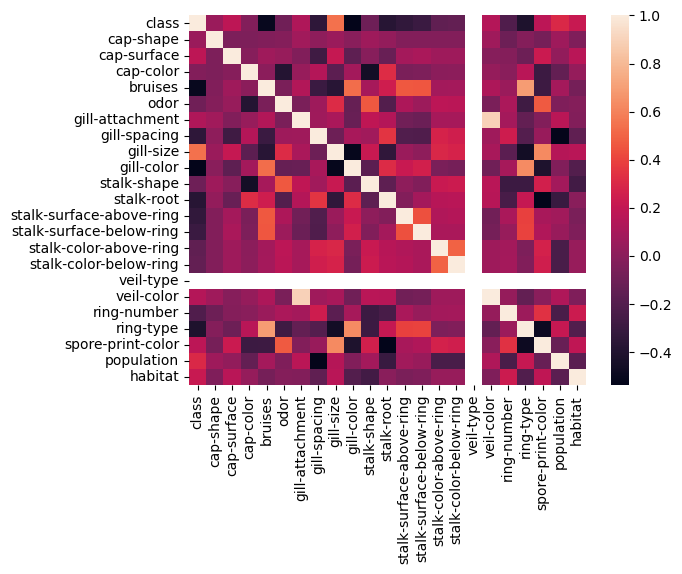

In [18]:
#visualize the relationship
sns.heatmap(df.corr())
# note here the white line in veil-type indicates that it is independent attribute and hence can be dropped if required

C:\Users\hp\anaconda3\new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


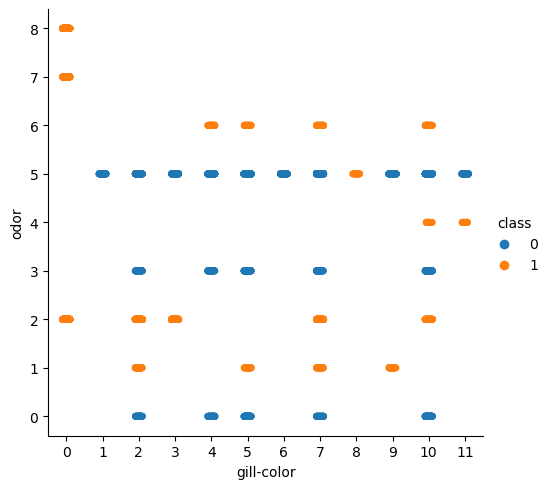

In [23]:
# display catplot
new_df=df.head(10)
sns.catplot(data=df,x='gill-color',y='odor',hue='class')

In [24]:
#display crosstab
pd.crosstab(df['class'].values,df['odor'].values,rownames=['class'],colnames=['odor'])

odor,0,1,2,3,4,5,6,7,8
class,,,,,,,,,
0,400,0,0,400,0,3408,0,0,0
1,0,192,2160,0,36,120,256,576,576


In [8]:
# perform label encoding to change the categorical data to ordinal data
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [10]:
# perform label encoding
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for col in df.columns:
    df[col] = label_enc.fit_transform(df[col])
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
# split into train and test data
from sklearn.model_selection import train_test_split
y = df['class'].values # target variable
x = df.drop(['class'],axis=1).values  # all data except target variable
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [16]:
# Build Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
acc = dt.score(x_test,y_test)

print("Accuracy of Decision Tree : {} % ".format(round(acc*100,2)))


Accuracy of Decision Tree : 100.0 % 


In [17]:
# Build SVM Classifier
from sklearn.svm import SVC
svm = SVC(random_state=42,gamma='auto')
svm.fit(x_train,y_train)
acc = svm.score(x_test,y_test)

print("Accuracy SVM Classifier : {} % ".format(round(acc*100,2)))


Accuracy SVM Classifier : 100.0 % 
